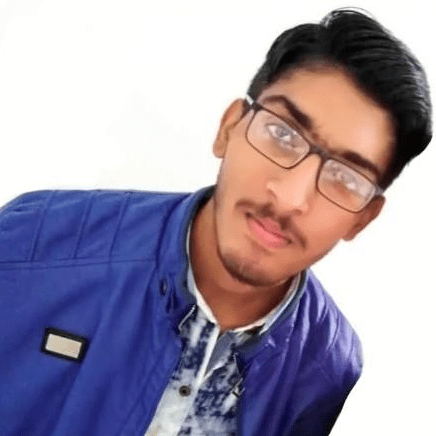

**Created By Muhammad Hanan Asghar**

**Uploading Dataset**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.data to iris.data
User uploaded file "iris.data" with length 4551 bytes


**Loading and Bird Eyeview in Dataset**

In [2]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['iris.data'].decode("utf-8")))
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**Importing Libraries**

In [3]:
# For Making our ANN
import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# For Graphing our Model
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
# Helpful Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Data Preprocessing**

In [4]:
dataset = pd.read_csv("iris.data")
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import LabelEncoder

# Handling Missing Data and Categorizing out Data

label_enc = LabelEncoder()

y1 = label_enc.fit_transform(y)

In [20]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [21]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
Y = pd.get_dummies(y1).values

In [23]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

**Let's Make Multiclass Classification ANN**

In [30]:
model = Sequential()

# Number of Columns
col = int(len(df.columns)) - 1

# Input and first Hidden Layer
model.add(
    Dense(
        col,
        input_shape = (col,),
        activation = "relu"
    )
)

# Output Layer
# Softmax for Multiclass
# Sigmoid for Single Class
# 3 is because our output is [0,1,0]
model.add(
    Dense(
        3,
        activation = "softmax"
    )
)

**Let's Compile our ANN**

In [32]:
# categorical_crossentropy due to multiclass
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=['accuracy'])

**Let's Train Our ANN**

In [35]:
model.fit(X_train,y_train, batch_size = 10, epochs = 180)

Epoch 1/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.9496
Epoch 2/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.9580
Epoch 3/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.9580
Epoch 4/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.9496
Epoch 5/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.9496
Epoch 6/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.9580
Epoch 7/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.9496
Epoch 8/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.9580
Epoch 9/180
12/12 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.9496
Epoch 10/180
12/12 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.9496
Epoch 11/

**Let's Test Our Trained Model**

In [47]:
y_pred = model.predict(X_test)
# argmax is used to get indes of maximum number in numpy array along x-axis or y-axis
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis = 1)

In [48]:
y_pred_class

array([2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2])

In [49]:
y_test_class

array([2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2])

**Let's Make Report of Our ANN**

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)
cr = classification_report(y_test_class, y_pred_class)

In [54]:
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  7]])

In [56]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [66]:
print("The Accuracy of our ANN is :",str(round((12+10+7) / 30, 3))+"%")

The Accuracy of our ANN is : 0.967%


**Saving our Final ANN**

In [67]:
model.save("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


**Let's Play more and Display Heatmap**

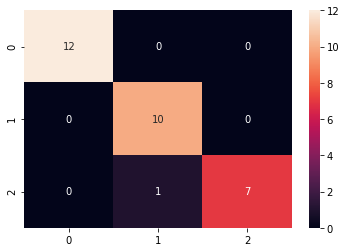

In [69]:
sns.heatmap(cm, annot=True)